In [103]:
import csv
import os
import pandas as pd
import numpy as np
from lxml import etree
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from pytz import utc

In [104]:
file_path = 'firedata/acd7ab63af8649e99356f4aef92d0cc7.csv'

fire_df = pd.read_csv(file_path)

print(fire_df)


        X   Y      id          initialdate               finaldate  area_ha  \
0     NaN NaN   39205  2008/07/10 00:00:00  2008/07/10 00:00:00+00       79   
1     NaN NaN   39987  2008/09/28 00:00:00  2008/09/28 00:00:00+00      176   
2     NaN NaN   39989  2008/09/30 00:00:00  2008/09/30 00:00:00+00      211   
3     NaN NaN   39991  2008/10/05 00:00:00  2008/10/05 00:00:00+00      281   
4     NaN NaN   39993  2008/10/05 00:00:00  2008/10/05 00:00:00+00      100   
...    ..  ..     ...                  ...                     ...      ...   
28001 NaN NaN  198950  2022/03/19 11:19:00  2022/03/19 11:19:00+00      304   
28002 NaN NaN  192923  2022/03/15 11:42:00  2022/03/15 11:42:00+00      282   
28003 NaN NaN  193114  2022/03/15 00:16:00  2022/03/15 00:16:00+00      215   
28004 NaN NaN  183483  2022/03/15 11:42:00  2022/03/15 11:42:00+00     4594   
28005 NaN NaN  206710  2022/07/22 20:02:00  2022/07/22 20:02:00+00      290   

      iso2 iso3                 country            

In [105]:
missing_data_percentage = fire_df.isna().mean() * 100

print("Missing Value (%) in App Dataframe:")
print(missing_data_percentage)


Missing Value (%) in App Dataframe:
X                                    100.000000
Y                                    100.000000
id                                     0.000000
initialdate                            0.000000
finaldate                              0.000000
area_ha                                0.000000
iso2                                   0.000000
iso3                                   0.000000
country                                0.000000
admlvl1                                0.000000
admlvl2                                0.560594
admlvl3                                4.884668
admlvl5                               10.076412
map_source                             0.000000
broadleaved_forest_percent             0.289224
coniferous_forest_percent              0.289224
mixed_forest_percent                   0.289224
sclerophillous_vegetation_percent      0.289224
transitional_vegetation_percent        0.289224
other_natural_percent                  0.289224
agri

In [106]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [107]:
# Initialize the MICE imputer
mice_imputer = IterativeImputer(random_state=0)

# Print the columns
print(fire_df.columns)

# Separate the numerical columns from the non-numerical ones
numerical_cols = fire_df.select_dtypes(include=['int64', 'float64']).columns
non_numerical_cols = fire_df.select_dtypes(exclude=['int64', 'float64']).columns

# Filter numerical columns that have missing values and have variance
numerical_cols_to_impute = [col for col in numerical_cols if fire_df[col].isnull().any() and fire_df[col].var() > 0]

# Apply the MICE imputer on the numerical columns
imp = IterativeImputer(max_iter=10, random_state=0)
fire_df[numerical_cols_to_impute] = imp.fit_transform(fire_df[numerical_cols_to_impute])

print('df_numerical_imputed')
print(fire_df[numerical_cols].columns)
print('df non numerical')
print(non_numerical_cols)

fire_df_imputed = fire_df.copy()

print('fire_df_imputed')
print(fire_df_imputed.columns)




Index(['X', 'Y', 'id', 'initialdate', 'finaldate', 'area_ha', 'iso2', 'iso3',
       'country', 'admlvl1', 'admlvl2', 'admlvl3', 'admlvl5', 'map_source',
       'broadleaved_forest_percent', 'coniferous_forest_percent',
       'mixed_forest_percent', 'sclerophillous_vegetation_percent',
       'transitional_vegetation_percent', 'other_natural_percent',
       'agriculture_percent', 'artificial_percent', 'other_percent',
       'natura2k_percent', 'noneu', 'updated', 'area_code', 'eu_area'],
      dtype='object')
df_numerical_imputed
Index(['X', 'Y', 'id', 'area_ha', 'broadleaved_forest_percent',
       'coniferous_forest_percent', 'mixed_forest_percent',
       'sclerophillous_vegetation_percent', 'transitional_vegetation_percent',
       'other_natural_percent', 'agriculture_percent', 'artificial_percent',
       'other_percent', 'natura2k_percent', 'noneu'],
      dtype='object')
df non numerical
Index(['initialdate', 'finaldate', 'iso2', 'iso3', 'country', 'admlvl1',
       'admlvl2

In [108]:
missing_data_percentage = fire_df_imputed.isna().mean() * 100

print("Missing Value (%) in App Dataframe:")
print(missing_data_percentage)


print('columns')
print(fire_df_imputed.columns)

fire_df_imputed = fire_df_imputed.drop(['admlvl2', 'admlvl3','admlvl5','X','Y'], axis=1)


Missing Value (%) in App Dataframe:
X                                    100.000000
Y                                    100.000000
id                                     0.000000
initialdate                            0.000000
finaldate                              0.000000
area_ha                                0.000000
iso2                                   0.000000
iso3                                   0.000000
country                                0.000000
admlvl1                                0.000000
admlvl2                                0.560594
admlvl3                                4.884668
admlvl5                               10.076412
map_source                             0.000000
broadleaved_forest_percent             0.000000
coniferous_forest_percent              0.000000
mixed_forest_percent                   0.000000
sclerophillous_vegetation_percent      0.000000
transitional_vegetation_percent        0.000000
other_natural_percent                  0.000000
agri

In [109]:
missing_data_percentage = fire_df_imputed.isna().mean() * 100

print("Missing Value (%) in App Dataframe:")
print(missing_data_percentage)

Missing Value (%) in App Dataframe:
id                                   0.0
initialdate                          0.0
finaldate                            0.0
area_ha                              0.0
iso2                                 0.0
iso3                                 0.0
country                              0.0
admlvl1                              0.0
map_source                           0.0
broadleaved_forest_percent           0.0
coniferous_forest_percent            0.0
mixed_forest_percent                 0.0
sclerophillous_vegetation_percent    0.0
transitional_vegetation_percent      0.0
other_natural_percent                0.0
agriculture_percent                  0.0
artificial_percent                   0.0
other_percent                        0.0
natura2k_percent                     0.0
noneu                                0.0
updated                              0.0
area_code                            0.0
eu_area                              0.0
dtype: float64


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder


In [111]:
from sklearn.cluster import KMeans

In [112]:

print(fire_df_imputed.columns)

# Create a k-means model
kmeans = KMeans(n_clusters=10)

# Fit the model and predict the size categories
fire_df_imputed['fire_size_category'] = kmeans.fit_predict(fire_df_imputed[['area_ha']])

Index(['id', 'initialdate', 'finaldate', 'area_ha', 'iso2', 'iso3', 'country',
       'admlvl1', 'map_source', 'broadleaved_forest_percent',
       'coniferous_forest_percent', 'mixed_forest_percent',
       'sclerophillous_vegetation_percent', 'transitional_vegetation_percent',
       'other_natural_percent', 'agriculture_percent', 'artificial_percent',
       'other_percent', 'natura2k_percent', 'noneu', 'updated', 'area_code',
       'eu_area'],
      dtype='object')


/Users/reinoutmensing/Desktop/Machine_learning/myproject/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [113]:
print(fire_df_imputed.columns)

Index(['id', 'initialdate', 'finaldate', 'area_ha', 'iso2', 'iso3', 'country',
       'admlvl1', 'map_source', 'broadleaved_forest_percent',
       'coniferous_forest_percent', 'mixed_forest_percent',
       'sclerophillous_vegetation_percent', 'transitional_vegetation_percent',
       'other_natural_percent', 'agriculture_percent', 'artificial_percent',
       'other_percent', 'natura2k_percent', 'noneu', 'updated', 'area_code',
       'eu_area', 'fire_size_category'],
      dtype='object')


In [114]:
# Assuming merged_df is your final dataframe
df = fire_df_imputed.copy()


# One-hot encoding of categorical variables
categorical_cols = fire_df_imputed.select_dtypes(include=['object']).columns
fire_df_imputed_encoded = pd.get_dummies(fire_df_imputed, columns=categorical_cols)

# Separating the features (X) and the target (y)
X = fire_df_imputed_encoded.drop('fire_size_category', axis=1)
y = fire_df_imputed_encoded['fire_size_category']

# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Training the model
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4990
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        15
           4       0.58      0.14      0.23       105
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.78      0.83      0.81       445
           8       0.20      0.03      0.06        31
           9       0.00      0.00      0.00         7

    accuracy                           0.96      5602
   macro avg       0.25      0.20      0.21      5602
weighted avg       0.95      0.96      0.95      5602



/Users/reinoutmensing/Desktop/Machine_learning/myproject/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reinoutmensing/Desktop/Machine_learning/myproject/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reinoutmensing/Desktop/Machine_learning/myproject/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

Variable: area_ha              Importance: 0.33
Variable: id                   Importance: 0.04
Variable: transitional_vegetation_percent Importance: 0.03
Variable: other_natural_percent Importance: 0.03
Variable: agriculture_percent  Importance: 0.03
Variable: broadleaved_forest_percent Importance: 0.02
Variable: coniferous_forest_percent Importance: 0.02
Variable: sclerophillous_vegetation_percent Importance: 0.02
Variable: natura2k_percent     Importance: 0.02
Variable: mixed_forest_percent Importance: 0.01
Variable: artificial_percent   Importance: 0.01
Variable: other_percent        Importance: 0.01
Variable: map_source_modis     Importance: 0.01
Variable: map_source_sentinel  Importance: 0.01
Variable: updated_2022/01/26 11:57:54.973 Importance: 0.01
Variable: noneu                Importance: 0.0
Variable: initialdate_2008/06/02 00:00:00 Importance: 0.0
Variable: initialdate_2008/06/07 00:00:00 Importance: 0.0
Variable: initialdate_2008/06/09 00:00:00 Importance: 0.0
Variable: in

Text(0.5, 1.0, 'Variable Importances')

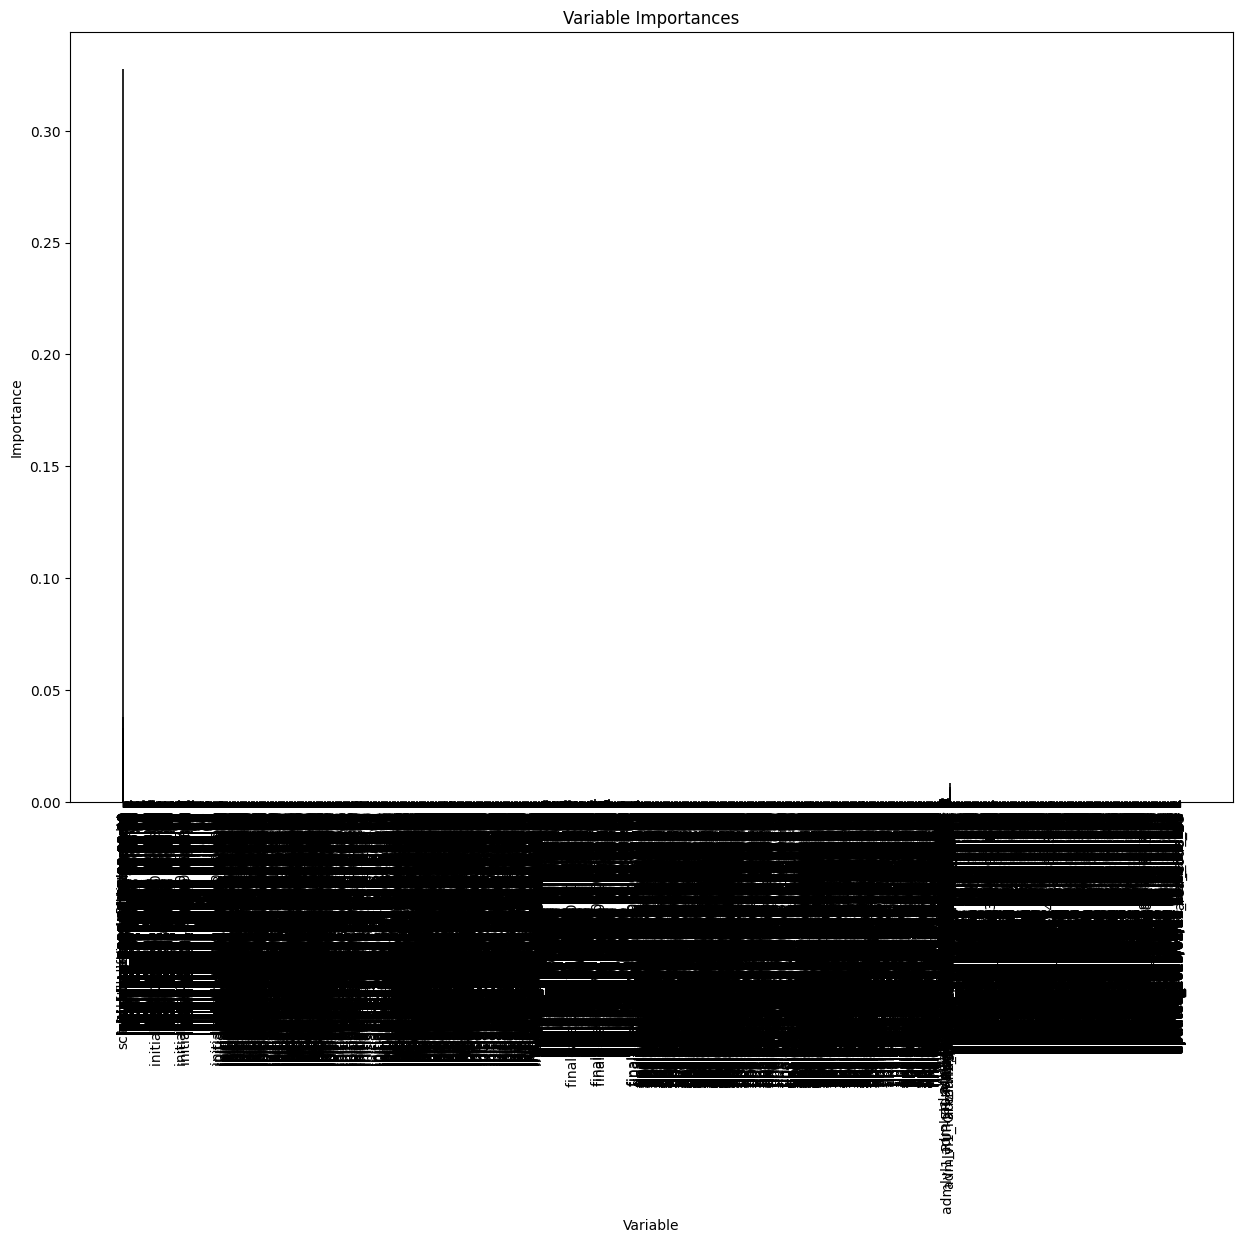

In [115]:
# Get numerical feature importances
importances = list(clf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))
